<a href="https://colab.research.google.com/github/Doro97/Twitter-Data-Analysis/blob/fix_bug/Copy_of_Twitter_Analysis_Topic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import json
import re
import os
import pandas as pd

import numpy as np

import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt


from textblob import TextBlob
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import pandas as pd
from pprint import pprint
import string




In [ ]:
#read the file
with open('/covid19.json', 'r') as myfile:
    data=myfile.read()

data


In [ ]:
tweet_df=pd.read_json(data, lines=True)
tweet_df.head()


,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,retweeted_status,is_quote_status,quote_count,reply_count,retweet_count,favorite_count,entities,favorited,retweeted,filter_level,lang,timestamp_ms,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,display_text_range,extended_tweet,possibly_sensitive,extended_entities,withheld_in_countries
0,2021-06-18 17:55:49+00:00,1405947374003015684,1405947374003015680,"RT @TelGlobalHealth: 🚨Africa is ""in the midst ...","<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,None,"{'id': 631549501, 'id_str': '631549501', 'name...",NaN,NaN,None,NaN,{'created_at': 'Thu Jun 17 16:18:28 +0000 2021...,False,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,2021-06-18 17:55:49.858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-06-18 17:55:59+00:00,1405947412364075010,1405947412364075008,RT @globalhlthtwit: Dr Moeti is head of WHO in...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,NaN,None,"{'id': 263162795, 'id_str': '263162795', 'name...",NaN,NaN,None,NaN,{'created_at': 'Fri Jun 18 16:40:24 +0000 2021...,True,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,2021-06-18 17:55:59.004,1.405895e+18,1.405895e+18,{'created_at': 'Fri Jun 18 14:27:42 +0000 2021...,"{'url': 'https://t.co/sOgIroihOc', 'expanded':...",NaN,NaN,NaN,NaN,NaN
2,2021-06-18 17:56:07+00:00,1405947447797587969,1405947447797587968,RT @NHSRDForum: Thank you @research2note for c...,"<a href=""http://twitter.com/download/iphone"" r...",False,NaN,NaN,NaN,NaN,None,"{'id': 1872940814, 'id_str': '1872940814', 'na...",NaN,NaN,None,NaN,{'created_at': 'Fri Jun 18 17:45:27 +0000 2021...,True,0,0,0,0,"{'hashtags': [{'text': 'red4research', 'indice...",False,False,low,en,2021-06-18 17:56:07.452,1.405884e+18,1.405884e+18,{'created_at': 'Fri Jun 18 13:44:53 +0000 2021...,"{'url': 'https://t.co/q5vWPPUnM7', 'expanded':...",NaN,NaN,NaN,NaN,NaN
3,2021-06-18 17:56:10+00:00,1405947462028873729,1405947462028873728,RT @HighWireTalk: Former Pfizer VP and Virolog...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,NaN,None,"{'id': 788165111408168960, 'id_str': '78816511...",NaN,NaN,None,NaN,{'created_at': 'Wed Jun 16 00:21:22 +0000 2021...,False,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,2021-06-18 17:56:10.845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-06-18 17:56:20+00:00,1405947503225229317,1405947503225229312,RT @PeterHotez: I think it’s important that we...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,NaN,None,"{'id': 28824136, 'id_str': '28824136', 'name':...",NaN,NaN,None,NaN,{'created_at': 'Fri Jun 18 13:34:47 +0000 2021...,True,0,0,0,0,"{'hashtags': [], 'urls': [], 'user_mentions': ...",False,False,low,en,2021-06-18 17:56:20.667,1.405860e+18,1.405860e+18,{'created_at': 'Fri Jun 18 12:07:28 +0000 2021...,"{'url': 'https://t.co/DGvCaXmWfI', 'expanded':...",NaN,NaN,NaN,NaN,NaN


In [ ]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6532 entries, 0 to 6531
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   created_at                 6532 non-null   datetime64[ns, UTC]
 1   id                         6532 non-null   int64              
 2   id_str                     6532 non-null   int64              
 3   text                       6532 non-null   object             
 4   source                     6532 non-null   object             
 5   truncated                  6532 non-null   bool               
 6   in_reply_to_status_id      266 non-null    float64            
 7   in_reply_to_status_id_str  266 non-null    float64            
 8   in_reply_to_user_id        289 non-null    float64            
 9   in_reply_to_user_id_str    289 non-null    float64            
 10  in_reply_to_screen_name    289 non-null    object             
 11  user

In [ ]:
tweet_df.shape

(6532, 37)

In [ ]:
tweet_df.columns

Index(['created_at', 'id', 'id_str', 'text', 'source', 'truncated',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'retweeted_status', 'is_quote_status', 'quote_count',
       'reply_count', 'retweet_count', 'favorite_count', 'entities',
       'favorited', 'retweeted', 'filter_level', 'lang', 'timestamp_ms',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status',
       'quoted_status_permalink', 'display_text_range', 'extended_tweet',
       'possibly_sensitive', 'extended_entities', 'withheld_in_countries'],
      dtype='object')

In [ ]:
# Extracting text from the data frame
Tweet_Texts=tweet_df['text'].values
Tweet_Texts


array(['RT @TelGlobalHealth: 🚨Africa is "in the midst of a full-blown third wave" of coronavirus, the head of @WHOAFRO has warned\n\nCases have risen…',
       'RT @globalhlthtwit: Dr Moeti is head of WHO in Africa, and one of the best public health experts and leaders I know. Hers is a desperate re…',
       'RT @NHSRDForum: Thank you @research2note for creating this amazing campaign &amp; turning social media #red4research today. @NHSRDFORUM is all…',
       ...,
       '@Jenfeds73 @DcrInYYC Respectfully, veterinarians have to have a broad knowledge of a multitude of viruses, includin… https://t.co/GI1B3MU0Sd',
       'RT @WHOAFRO: "Africa needs millions more doses here &amp; now to curb the third wave."\n\nIn the midst of a third wave of #COVID19 cases in #Afri…',
       'RT @shawajason: Liars. You tried to load off your expired vaccines. Just another war crime by Israel. https://t.co/MBBXzCwqqZ https://t.co/…'],
      dtype=object)

In [ ]:
# Converting the text column as a single string for wordcloud
Tweet_Str=str(Tweet_Texts)
Tweet_Str
 


'[\'RT @TelGlobalHealth: 🚨Africa is "in the midst of a full-blown third wave" of coronavirus, the head of @WHOAFRO has warned\\n\\nCases have risen…\'\n \'RT @globalhlthtwit: Dr Moeti is head of WHO in Africa, and one of the best public health experts and leaders I know. Hers is a desperate re…\'\n \'RT @NHSRDForum: Thank you @research2note for creating this amazing campaign &amp; turning social media #red4research today. @NHSRDFORUM is all…\'\n ...\n \'@Jenfeds73 @DcrInYYC Respectfully, veterinarians have to have a broad knowledge of a multitude of viruses, includin… https://t.co/GI1B3MU0Sd\'\n \'RT @WHOAFRO: "Africa needs millions more doses here &amp; now to curb the third wave."\\n\\nIn the midst of a third wave of #COVID19 cases in #Afri…\'\n \'RT @shawajason: Liars. You tried to load off your expired vaccines. Just another war crime by Israel. https://t.co/MBBXzCwqqZ https://t.co/…\']'

In [ ]:

# Converting the whole text to lowercase
Clean_Text = Tweets_Str.lower()
Clean_Text
 


'[\'rt @telglobalhealth: 🚨africa is "in the midst of a full-blown third wave" of coronavirus, the head of @whoafro has warned\\n\\ncases have risen…\'\n \'rt @globalhlthtwit: dr moeti is head of who in africa, and one of the best public health experts and leaders i know. hers is a desperate re…\'\n \'rt @nhsrdforum: thank you @research2note for creating this amazing campaign &amp; turning social media #red4research today. @nhsrdforum is all…\'\n ...\n \'@jenfeds73 @dcrinyyc respectfully, veterinarians have to have a broad knowledge of a multitude of viruses, includin… https://t.co/gi1b3mu0sd\'\n \'rt @whoafro: "africa needs millions more doses here &amp; now to curb the third wave."\\n\\nin the midst of a third wave of #covid19 cases in #afri…\'\n \'rt @shawajason: liars. you tried to load off your expired vaccines. just another war crime by israel. https://t.co/mbbxzcwqqz https://t.co/…\']'

In [ ]:
# Removing the twitter usernames from tweet string
Clean_Text=re.sub(r'@\w+', ' ', Clean_Text)
Clean_Text


'[\'rt  : 🚨africa is "in the midst of a full-blown third wave" of coronavirus, the head of   has warned\\n\\ncases have risen…\'\n \'rt  : dr moeti is head of who in africa, and one of the best public health experts and leaders i know. hers is a desperate re…\'\n \'rt  : thank you   for creating this amazing campaign &amp; turning social media #red4research today.   is all…\'\n ...\n \'    respectfully, veterinarians have to have a broad knowledge of a multitude of viruses, includin… https://t.co/gi1b3mu0sd\'\n \'rt  : "africa needs millions more doses here &amp; now to curb the third wave."\\n\\nin the midst of a third wave of #covid19 cases in #afri…\'\n \'rt  : liars. you tried to load off your expired vaccines. just another war crime by israel. https://t.co/mbbxzcwqqz https://t.co/…\']'

In [ ]:
# Removing the URLS from the tweet string
Clean_Text=re.sub(r'http\S+', ' ', Clean_Text)
Clean_Text


'[\'rt  : 🚨africa is "in the midst of a full-blown third wave" of coronavirus, the head of   has warned\\n\\ncases have risen…\'\n \'rt  : dr moeti is head of who in africa, and one of the best public health experts and leaders i know. hers is a desperate re…\'\n \'rt  : thank you   for creating this amazing campaign &amp; turning social media #red4research today.   is all…\'\n ...\n \'    respectfully, veterinarians have to have a broad knowledge of a multitude of viruses, includin…  \n \'rt  : "africa needs millions more doses here &amp; now to curb the third wave."\\n\\nin the midst of a third wave of #covid19 cases in #afri…\'\n \'rt  : liars. you tried to load off your expired vaccines. just another war crime by israel.    '

In [ ]:
# Deleting everything which is not characters
Clean_Text = re.sub(r'[^a-z A-Z]', ' ',Clean_Text)
Clean_Text


'  rt     africa is  in the midst of a full blown third wave  of coronavirus  the head of   has warned n ncases have risen     rt    dr moeti is head of who in africa  and one of the best public health experts and leaders i know  hers is a desperate re     rt    thank you   for creating this amazing campaign  amp  turning social media  red research today    is all              respectfully  veterinarians have to have a broad knowledge of a multitude of viruses  includin      rt     africa needs millions more doses here  amp  now to curb the third wave   n nin the midst of a third wave of  covid   cases in  afri     rt    liars  you tried to load off your expired vaccines  just another war crime by israel     '

In [ ]:
# Deleting any word which is less than 3-characters mostly those are stopwords
Clean_Text= re.sub(r'\b\w{1,2}\b', '', Clean_Text)
Clean_Text


'       africa    the midst   full blown third wave   coronavirus  the head    has warned  ncases have risen          moeti  head  who  africa  and one  the best public health experts and leaders  know  hers   desperate          thank you   for creating this amazing campaign  amp  turning social media  red research today     all              respectfully  veterinarians have  have  broad knowledge   multitude  viruses  includin           africa needs millions more doses here  amp  now  curb the third wave    nin the midst   third wave   covid   cases   afri         liars  you tried  load off your expired vaccines  just another war crime  israel     '

In [ ]:
# Stripping extra spaces in the text
Clean_Text= re.sub(r' +', ' ', Clean_Text)
 
Clean_Text

' africa the midst full blown third wave coronavirus the head has warned ncases have risen moeti head who africa and one the best public health experts and leaders know hers desperate thank you for creating this amazing campaign amp turning social media red research today all respectfully veterinarians have have broad knowledge multitude viruses includin africa needs millions more doses here amp now curb the third wave nin the midst third wave covid cases afri liars you tried load off your expired vaccines just another war crime israel '

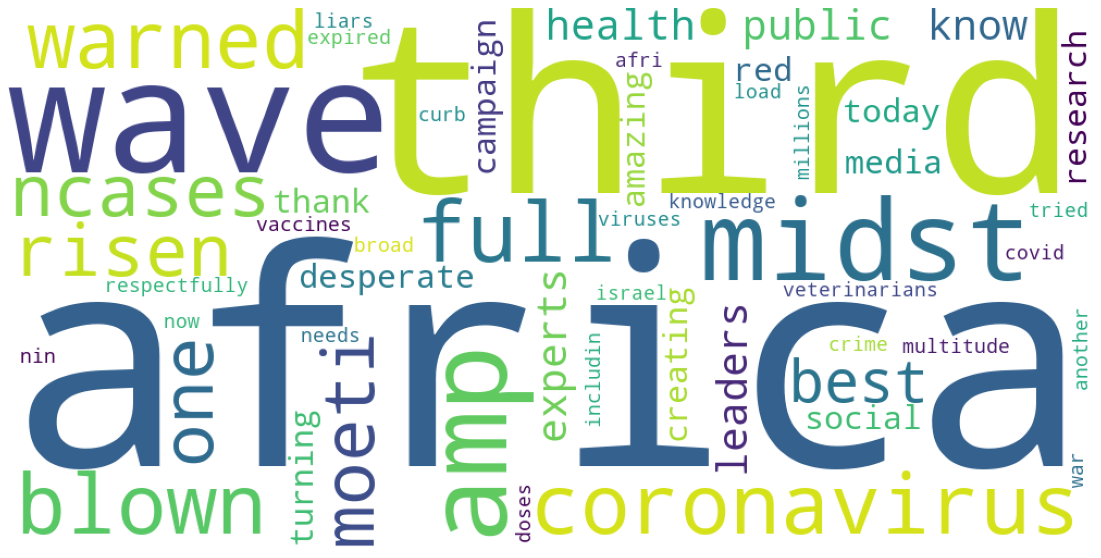

In [ ]:
# Plotting the wordcloud 
# you can specify fonts, stopwords, background color and other options
import matplotlib.pyplot as plt
 
# Creating the custom stopwords
customStopwords=list(STOPWORDS)+ ['cases','virus','head']
 
wordcloudimage = WordCloud(
                          max_words=100,
                          max_font_size=500,
                          font_step=2,
                          stopwords=customStopwords,
                          background_color='white',
                          width=1000,
                          height=500
                          ).generate(Tweet_Texts_Cleaned)
 
plt.figure(figsize=(20,10))
plt.axis("off")
plt.imshow(wordcloudimage)
wordcloudimage
plt.show()